In [1]:
import pandas as pd
import seaborn as srn
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Panorama Geral:

## Dicionário de dados:

1.   Age: Idade
2.   Attrition: Colaborador saiu ou não saiu?
*   0-Não
*   1-Sim

3.   BusinessTravel:Frequência de viagem de um colaborador
4.   Department: Departamento do colaborador
5.   DistanceFromHome: Distância entre casa e trabalho
6.   EducationField: Campo de educação. Qual área o colaborador estudou?
7.   EmployeeNumber: Número do colaborador
8.   EnvironmentSatisfaction: Satisfação do ambiente de trabalho:
*   1-Low
*   2-Medium
*   3-High
*   4-Very High
9.   Gender: Gênero
10.  MartialStatus: Estado civil
11.  MonthlyIncome: Renda mensal em USD
12.  NumCompaniesWorked: Número de empresas que já trabalhou
13.  OverTime: O colaborador faz hora extra?
14.  PercentSalaryHike: Média de aumento de salário anual
15.  StockOptionLevel: Ações da empresa dadas a um funcionário:
*   0-No Stocks
*   1-Less Stocks
*   2-Moderate Stocks
*   3-A lot of stocks
16.  TotalWorkingYears: Total anos de experiência trabalhados
17.  TrainingTimesLastYear: Número de treinamentos que o colaborador fez
18.  YearsAtCompany: Anos trabalhados na empresa
19.  YearsInCurrentRole: Anos na atual função
20.  YearsSinceLastPromotion: Número de anos desde última promoção
21.  YearsWithCurrManager: Anos trabalhados com o atual gerente
22.  Education: Educação
*   1-Bellow College
*   2-College
*   3-Bachelor
*   4-Master
*   5-Doctor
23.  JobEnvolviment: Envolvimento no trabalho.
*   1-Low
*   2-Medium
*   3-High
*   4-Very High
24.   JobSatisfaction: Satisfação no trabalho.
*   1-Low
*   2-Medium
*   3-High
*   4-Very high
25.   PerformanceRating: Nota de performance.
*   1-Low
*   2-Good
*   3-Excellent
*   4-Outstanding









## Medida de desempenho:

  O objetivo do projeto é prever colaboradores com tendência de sair da empresa e assim diminuir o TurnAround. Sendo assim, a medida de desempenho mais importante será Recall pois ele mede a taxa de verdadeiros positivos.
  As métricas serão utilizadas na seguinte prioridade:

1.   ROC AUC
2.   Recall
3.   Precision





# Exploração de dados 1:
1.   Verificação do tamanho do DataFrame e conhecer cada atributo.
  
2.   Verificação de dados faltantes (NA's) ---> Não há dados faltantes
  
3.   Verificação de colunas com valor único ---> Há colunas com valores únicos: "EmployeeCount" e "StandardHour"

In [2]:
#Importação do DataBase:
df = pd.read_csv("Human_Resources.csv")

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

---> Não há dados faltantes

In [6]:
df.groupby("Attrition").size()

Attrition
No     1233
Yes     237
dtype: int64

---> De acordo com a "regra de 10", o modelo ideal deve ter 23 ou 24 características!

---> Os dados estão balanceados.

In [7]:
# Separação entre características categóricas e numéricas:
carac_num = []
carac_cat = []

def separa_carac (column):
  if df[column].dtypes == "int64":
    carac_num.append(column)
  else:
    carac_cat.append(column)
# Verificarei posteriormente se realmente as colunas com dtype object não são na verdade int64 e vice-versa.

In [8]:
columns = df.columns.tolist()

In [9]:
for column in columns:
  separa_carac(column)

In [10]:
#Características numéricas:
carac_num

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
#Verificação:
df_num = df[carac_num]
df_num
#A coluna "Education" seria conceitualmente categórica.
#No projeto, será deixada como característica numérica pois as características categóricas serão transformadas em números posteriormente.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [12]:
#Características categóricas:
carac_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [13]:
#Verificação:
df_cat = df[carac_cat]
df_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


# Escalonamento de dados:

In [14]:
label = LabelEncoder()
for features in carac_cat:
  df[features] = label.fit_transform(df[features])

In [15]:
#Transformando o type de object para int64:
def trans_to_int (column):
  df[column] = df[column].astype("int64")

for carac in carac_cat:
  trans_to_int(carac)

# Exploração de dados 2:

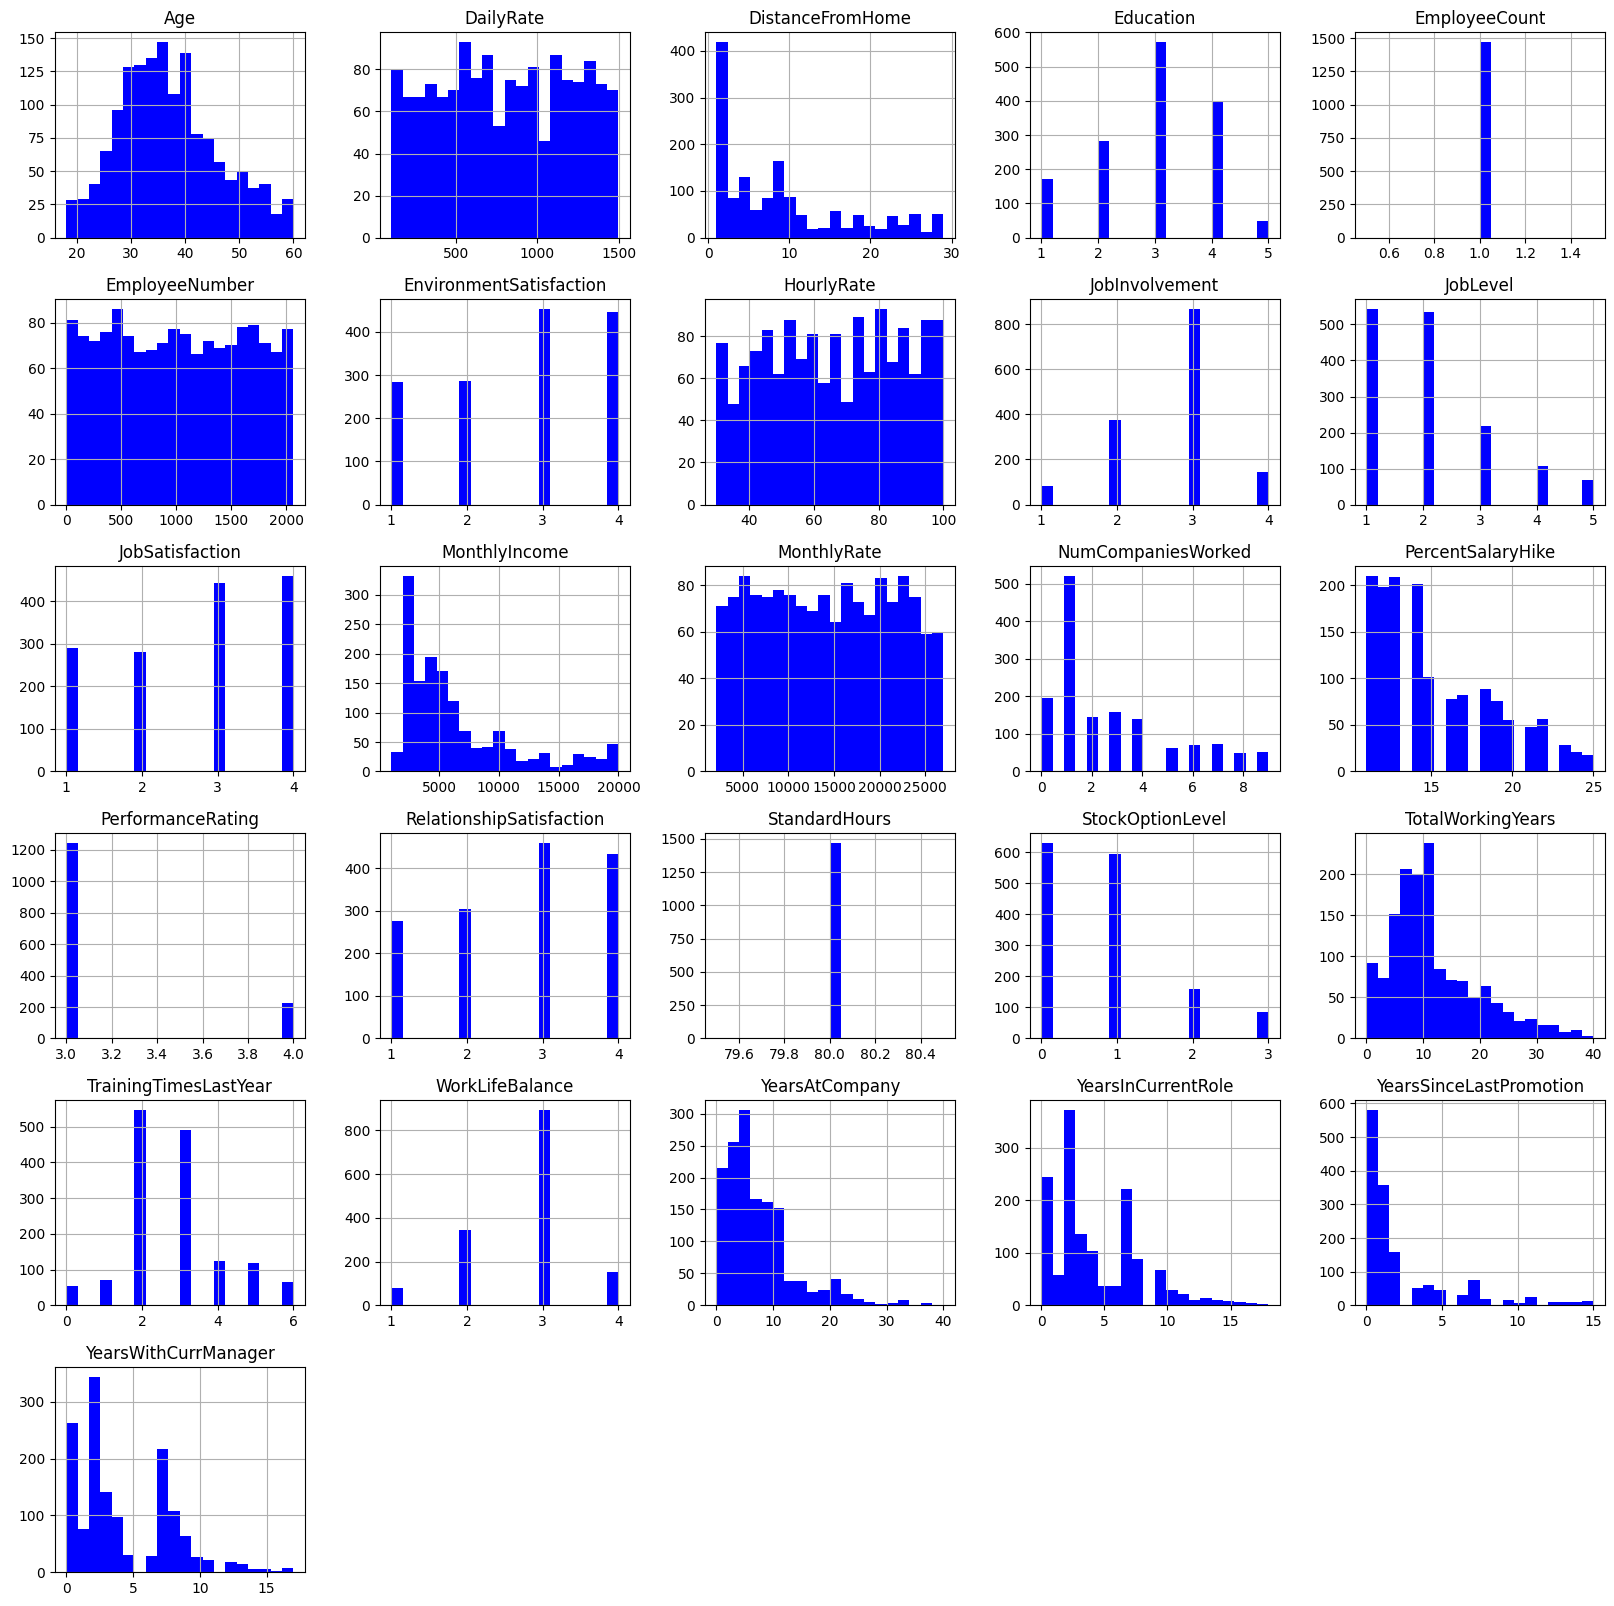

In [16]:
#Distribuição das características:
df_num.hist( bins=20 , figsize=(20,20), color='blue');

1.   À primeira vista não há nenhuma característica distribuida normalmente.

2.   Os dados presentes na coluna "EmployeeCount", "StandardHours" e "Over18" são iguais para todas as linhas. Não possuem poder preditivo e portanto podem ser excluidas.

3.   A coluna "EmployeeNumber" é a contagem do número de colaboradores. Não possuem poder preditivo e portante pode ser excluida.

4.   As três colunas mencionadas acima podem ser removidas pois não agregam para classificar colaboradores que vão sair da empresa.

# Tratamento de dados:
1.   Excluir colunas: "EmployeeCount", "StandardHours", "Over18" e "EmployeeNumber"


In [17]:
df.drop( columns=["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], inplace=True)

# Exploração de dados 3:
  4) Verificação de correlações entre variáveis numéricas:

  5) TestT:
  
  6) Verificação de Outliers geral ---> Há Outliers em "MonthlyIncome"! Dados são corretos pois são de JobLevels alto

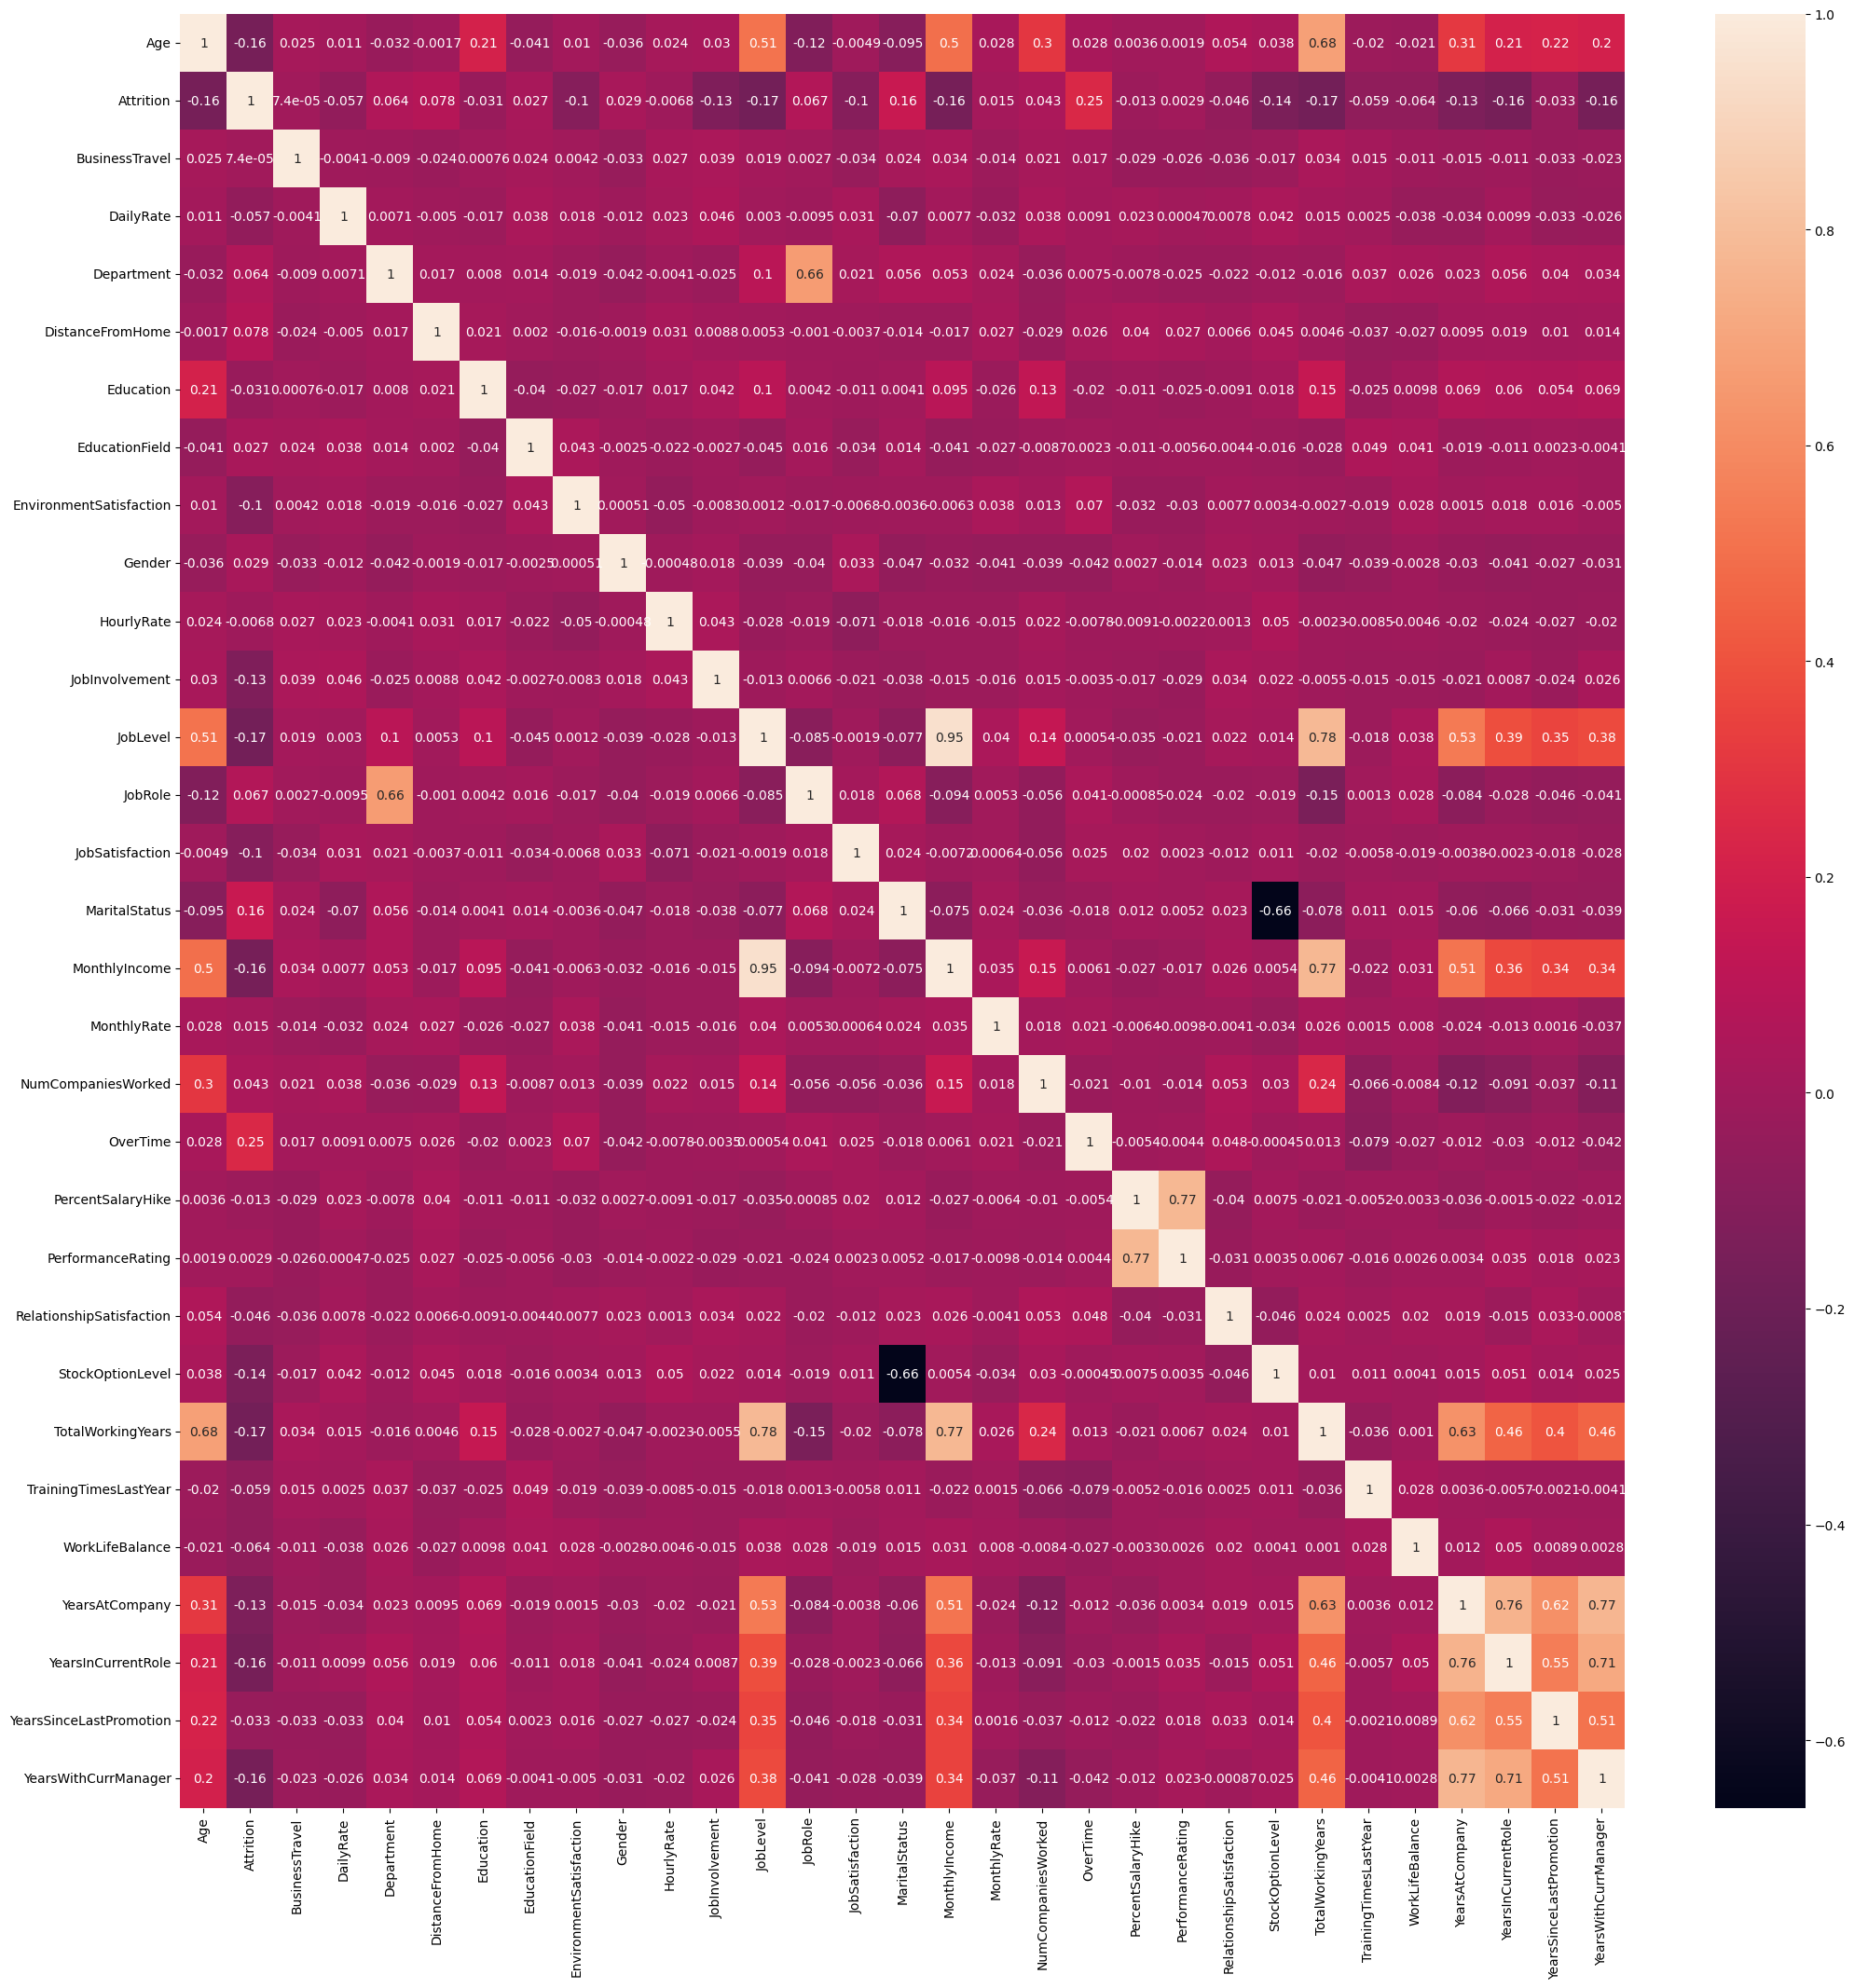

In [18]:
#Correlações:
correlations = df.corr()
f, ax = plt.subplots(figsize=(25,25))
srn.heatmap(correlations, annot=True);
#Há multicolinearidade de características!

Características multicolineares - correlações fortes:

1) YearsAtCompany X YearsWithCurrManager:

2) YearsInCurrRole X YearsWithCurreManager:

3) YearInCurrRole X YearsAtCompany:

4) TotalWorkingYears X JobLevel:

5) TotalWorkingYears X MonthlyIncome:

6) PerformancingRate X PercentSalaryHike:

7) JobRole X Department:

In [19]:
#Test-T:
features_response = ["Age", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField",
                     "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction",
                     "MaritalStatus", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "OverTime", "PercentSalaryHike",
                     "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
                     "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
X_exp = df[features_response]

In [20]:
y_exp = df["Attrition"]

In [21]:
f_stat, f_p_value = f_classif(X_exp, y_exp)

In [22]:
f_test_df = pd.DataFrame({"Feature":features_response,
                         "F statistic": f_stat,
                         "p value": f_p_value}
                         )

In [23]:
f_test_df.sort_values("p value")

,Feature,F statistic,p value
18,OverTime,94.656457,1.009254e-21
23,TotalWorkingYears,44.252491,4.061878e-11
11,JobLevel,43.215344,6.795385e-11
14,MaritalStatus,39.599763,4.106015e-10
27,YearsInCurrentRole,38.838303,6.003186e-10
15,MonthlyIncome,38.488819,7.147364e-10
0,Age,38.175887,8.356308e-10
29,YearsWithCurrManager,36.712311,1.736987e-09
22,StockOptionLevel,28.140501,1.301015e-07
26,YearsAtCompany,27.001624,2.318872e-07


In [24]:
#As possíveis melhores características preditivas são:
best_features = f_test_df.loc[f_test_df["p value"] <= 0.05, "Feature"]
best_features = best_features.tolist()
best_features

['Age',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

Para Regressão Logística ---> Características multicolineares - correlações fortes:

1) YearsAtCompany X YearsWithCurrManager: Excluir YearsWithCurrManager

2) YearsInCurrRole X YearsWithCurreManager: Excluir YearsWithCurrManager

3) YearInCurrRole X YearsAtCompany: Excluir YearsAtCompany

4) TotalWorkingYears X JobLevel: Excluir TotalWorkingYears

5) TotalWorkingYears X MonthlyIncome: Excluir TotalWorkingYears

6) PerformancingRate X PercentSalaryHike:

7) JobRole X Department: Não é necessário excluir.

# Outliers:

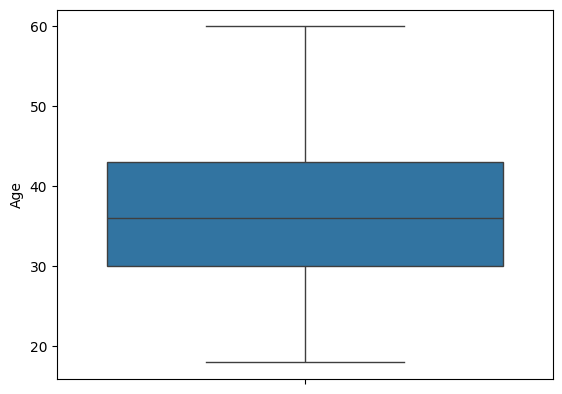

In [25]:
#Outliers: Age
srn.boxplot(data=df,
            y="Age",
           );

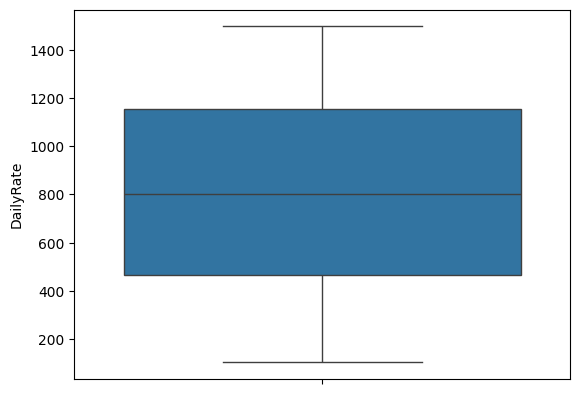

In [26]:
srn.boxplot(data=df,
            y="DailyRate",
           );

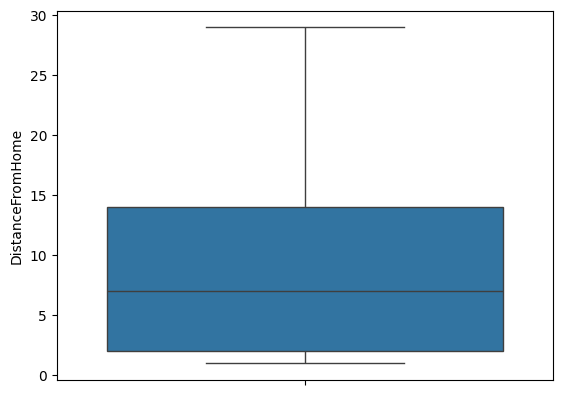

In [27]:
srn.boxplot(data=df,
            y="DistanceFromHome",
           );

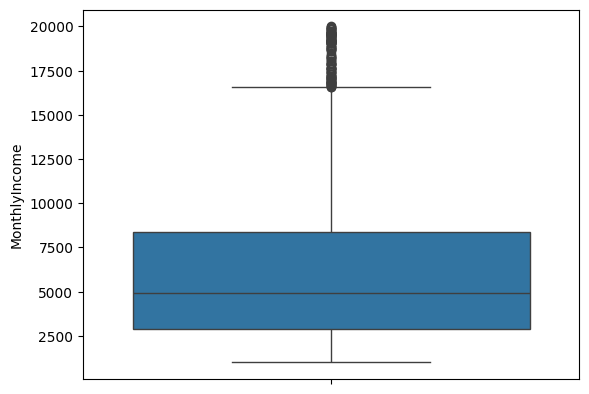

In [28]:
srn.boxplot(data=df,
            y="MonthlyIncome",
           );

In [29]:
df_mi = df.loc[df["MonthlyIncome"] >= 15000]

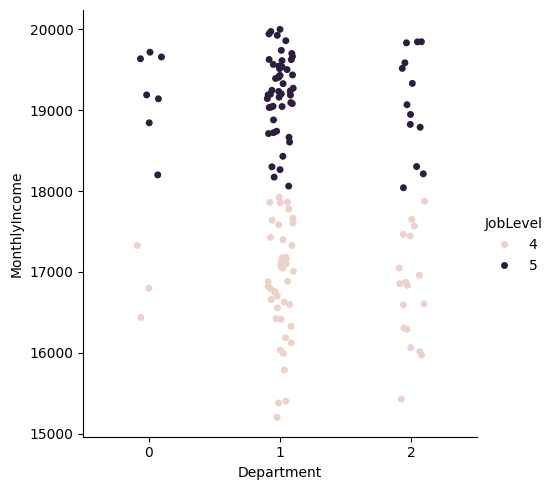

In [30]:
#Análise dos Outliers do BoxPlot de "MonthlyIncome" acima.
srn.catplot(data=df_mi,
            x="Department",
            y="MonthlyIncome",
            hue="JobLevel",
           );
#Conclusão: Outliers são colaboradores com JobLevels mais altos 4 e 5.

# Exploração de dados 3:
  7) Insights

In [31]:
df_y = df.loc[df["Attrition"] == 1]
df_n = df.loc[df["Attrition"] == 0]

In [32]:
print("Total de colaboradores é: ", len(df), "pessoas")
print("Total de colaboradores que saíram é: ", len(df_y), "pessoas")

formula1 = (len(df_y)/len(df))*100
string1 = f"Porcentagem de colaboradores que saíram é: {formula1:.1f}%"
print(string1)

print("Total de colaboradores que ficaram é: ", len(df_n), "pessoas")

formula2 = len(df_n)/len(df)*100
string2 = f"Porcentagem de colaboradores que saíram é: {formula2:.1f}%"
print(string2)

Total de colaboradores é:  1470 pessoas
Total de colaboradores que saíram é:  237 pessoas
Porcentagem de colaboradores que saíram é: 16.1%
Total de colaboradores que ficaram é:  1233 pessoas
Porcentagem de colaboradores que saíram é: 83.9%


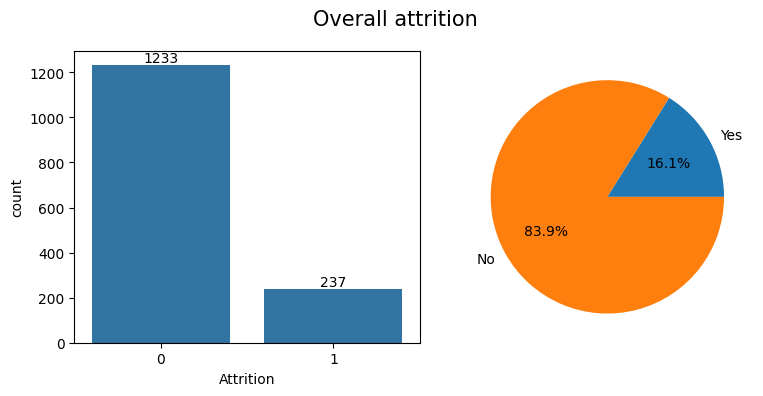

In [33]:
f, axs = plt.subplots(1, 2, figsize=(8, 4))
plot1 = srn.countplot(data=df, x="Attrition", ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container)
plot2 = plt.pie([len(df_y)/len(df)*100,len(df_n)/len(df)*100], labels=["Yes","No"], autopct='%1.1f%%')
plt.suptitle("Overall attrition",fontsize=15)
f.tight_layout()

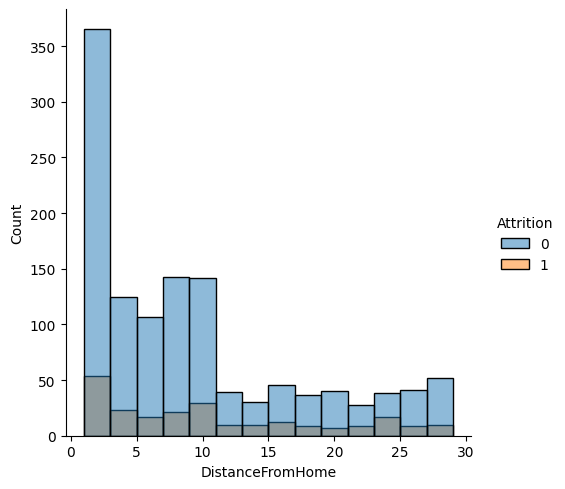

In [34]:
srn.displot(df,
            x="DistanceFromHome",
            hue="Attrition",
            );
#Hipótese: A distância da casa até o trabalho influencia o colaborador a sair do atual emprego.

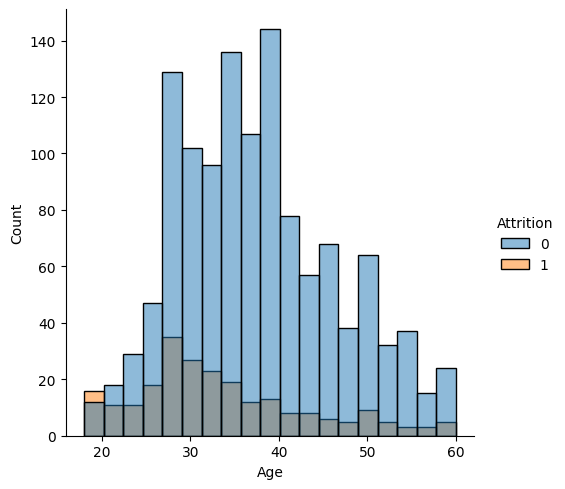

In [35]:
srn.displot(df,
            x="Age",
            hue="Attrition"
            );
#Hipótese: Colaboradores mais novos têm churn maiores.

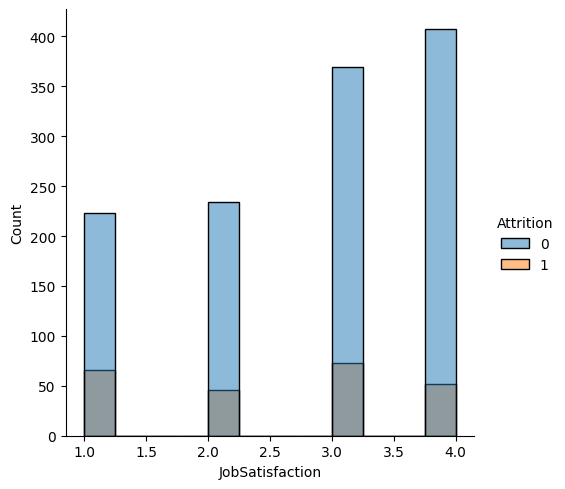

In [36]:
srn.displot(df,
            x="JobSatisfaction",
            hue="Attrition"
            );
#Hipótese: Colaboradores mais insatisfeitos tendem a sair do atual emprego.

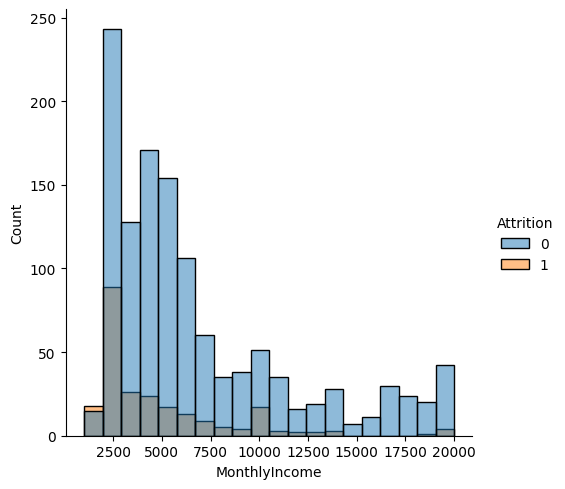

In [37]:
srn.displot(df,
            x="MonthlyIncome",
            hue="Attrition"
            );
#Hipótese: Colaboradores que ganham menos tendem a sair do atual emprego.
#Comentário: Faz sentido essa hipótese ser verdadeira pois há um correlação moderada entre MonthlyIncome e Age.

Hipóteses:
  
  1)
  
  H0: Não existe diferença significativa de "DistanceFromHome" entre os colaboradores que saíram e os que não saíram.
  
  Ha: Existe diferença significativa de "DistanceFromHome" entre os colaboradores que saíram e os que não saíram.
_____________________________________________________________________
  2)
  
  H0: Não existe diferença significativa de "Age" entre os colaboradores que saíram e os que não saíram.
  
  Ha: Existe diferença significativa de "Age" entre os colaboradores que saíram e os que não saíram.
_____________________________________________________________________
  3)
  
  H0: Não existe diferença significativa de "JobSatisfaction" entre os colaboradores que saíram e os que não saíram.

  Ha: Existe diferença significativa de "JobSatisfaction" entre os colaboradores que saíram e os que não saíram.
______________________________________________________________________
  4)
  
  H0: Não existe diferença significativa de "MonthlyIncome" entre os colaboradores que saíram e os que não saíram.
  
  Ha: Não existe diferença significativa de "MonthlyIncome" entre os colaboradores que saíram e os que não saíram.

In [38]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu, ttest_ind

df_y_test = df_y["DistanceFromHome"]
df_n_test = df_n["DistanceFromHome"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval <0.05: return False
    return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Realizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "DistanceFromHome" entre os dois grupos de colaboradores.

Realizando U-Test...


MannwhitneyuResult(statistic=164225.5, pvalue=0.0023870470273627984)

In [39]:
df_y_test = df_y["Age"]
df_n_test = df_n["Age"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "Age" entre os dois grupos de colaboradores.

Realizando t-test...


TtestResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10, df=1468.0)

In [40]:
df_y_test = df_y["JobSatisfaction"]
df_n_test = df_n["JobSatisfaction"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "JobSatisfaction" entre os dois grupos de colaboradores.

Realizando t-test...


TtestResult(statistic=-3.9862267630568273, pvalue=7.04306674173115e-05, df=1468.0)

In [41]:
df_y_test = df_y["MonthlyIncome"]
df_n_test = df_n["MonthlyIncome"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "MonthlyIncome" entre os dois grupos de colaboradores.

Relizando t-test com variancia diferente...


TtestResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13, df=412.74074755747006)

# Pré-processamento:

1) YearsAtCompany X YearsWithCurrManager: Excluir YearsWithCurrManager

2) YearsInCurrRole X YearsWithCurreManager: Excluir YearsWithCurrManager

3) YearInCurrRole X YearsAtCompany: Excluir YearsAtCompany

4) TotalWorkingYears X JobLevel: Excluir TotalWorkingYears

5) TotalWorkingYears X MonthlyIncome: Excluir TotalWorkingYears

6) PerformancingRate X PercentSalaryHike:

7) JobRole X Department: Não é necessário excluir.

In [42]:
best_features

['Age',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [43]:
best_cat = [features for features in best_features if features in carac_cat]
best_cat

['Department', 'JobRole', 'MaritalStatus', 'OverTime']

In [44]:
df_cat = df[best_cat]
df_cat

,Department,JobRole,MaritalStatus,OverTime
0,2,7,2,1
1,1,6,1,0
2,1,2,2,1
3,1,6,1,1
4,1,2,1,0
...,...,...,...,...
1465,1,2,1,0
1466,1,0,1,0
1467,1,4,1,1
1468,2,7,1,0


In [45]:
onehotencoder = OneHotEncoder()
df_cat = onehotencoder.fit_transform(df_cat).toarray()

In [46]:
df_cat = pd.DataFrame(df_cat)

In [47]:
best_num = [features for features in best_features if features not in carac_cat]
best_num

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [48]:
df_num = df[best_num]

In [49]:
df_num

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1102,1,2,3,2,4,5993,0,8,0,1,6,4,5
1,49,279,8,3,2,2,2,5130,1,10,3,3,10,7,7
2,37,1373,2,4,2,1,3,2090,0,7,3,3,0,0,0
3,33,1392,3,4,3,1,3,2909,0,8,3,3,8,7,0
4,27,591,2,1,3,1,2,3468,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,3,4,2,4,2571,1,17,3,3,5,2,3
1466,39,613,6,4,2,3,1,9991,1,9,5,3,7,7,7
1467,27,155,4,2,4,2,2,6142,1,6,0,3,6,2,3
1468,49,1023,2,4,2,2,2,5390,0,17,3,2,9,6,8


In [50]:
X = pd.concat([df_cat, df_num], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,41,1102,1,2,3,2,4,5993,0,8,0,1,6,4,5
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,49,279,8,3,2,2,2,5130,1,10,3,3,10,7,7
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,37,1373,2,4,2,1,3,2090,0,7,3,3,0,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,33,1392,3,4,3,1,3,2909,0,8,3,3,8,7,0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,27,591,2,1,3,1,2,3468,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,36,884,23,3,4,2,4,2571,1,17,3,3,5,2,3
1466,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,39,613,6,4,2,3,1,9991,1,9,5,3,7,7,7
1467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27,155,4,2,4,2,2,6142,1,6,0,3,6,2,3
1468,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,49,1023,2,4,2,2,2,5390,0,17,3,2,9,6,8


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   0                        1470 non-null   float64
 1   1                        1470 non-null   float64
 2   2                        1470 non-null   float64
 3   3                        1470 non-null   float64
 4   4                        1470 non-null   float64
 5   5                        1470 non-null   float64
 6   6                        1470 non-null   float64
 7   7                        1470 non-null   float64
 8   8                        1470 non-null   float64
 9   9                        1470 non-null   float64
 10  10                       1470 non-null   float64
 11  11                       1470 non-null   float64
 12  12                       1470 non-null   float64
 13  13                       1470 non-null   float64
 14  14                      

In [52]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X.values)
X

array([[0.        , 0.        , 1.        , ..., 0.15      , 0.22222222,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.25      , 0.38888889,
        0.41176471],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.15      , 0.11111111,
        0.17647059],
       [0.        , 0.        , 1.        , ..., 0.225     , 0.33333333,
        0.47058824],
       [0.        , 1.        , 0.        , ..., 0.1       , 0.16666667,
        0.11764706]])

In [53]:
y = df.loc[:,["Attrition"]].values
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [54]:
y = y.astype(int)

# Treinamento e teste do algoritmo:

Ajuste e treinamento do modelo:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [56]:
X_train.shape

(1102, 32)

In [57]:
logistic = LogisticRegression(solver="liblinear")
logistic.fit(X_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
#Checagem de Overfitting e Underfitting.
prev_train = logistic.predict(X_train)
prev_train

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
confusao1 = confusion_matrix(y_train, prev_train)
confusao1

array([[914,  16],
       [112,  60]])

In [60]:
score1 = accuracy_score(y_train, prev_train)
score1

0.8838475499092558

In [61]:
score2 = precision_score(y_train, prev_train)
score2

0.7894736842105263

In [62]:
score3 = recall_score(y_train, prev_train)
score3

0.3488372093023256

In [63]:
pos_prob = logistic.predict_proba(X_train)

In [64]:
pos_prob = pos_prob[:,1]
pos_prob

array([0.00581496, 0.1493528 , 0.41844936, ..., 0.392857  , 0.02283603,
       0.08149373])

In [65]:
roc_auc_score(y_train, pos_prob)
#Não há Overfitting nem Underfitting. roc_auc_score_test é semelhante.

0.8433545886471618

In [66]:
previsoes = logistic.predict(X_test)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Verificação dos resultados - Regressão Logística:

In [67]:
confusao2 = confusion_matrix(y_test, previsoes)
confusao2

array([[296,   7],
       [ 53,  12]])

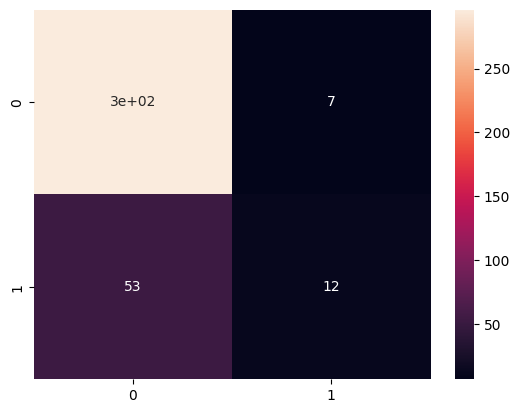

In [68]:
srn.heatmap(confusao2, annot=True);

In [69]:
score1 = accuracy_score(y_test, previsoes)
score1

0.8369565217391305

In [70]:
score2 = precision_score(y_test, previsoes)
score2

0.631578947368421

In [71]:
score3 = recall_score(y_test, previsoes)
score3

0.18461538461538463

In [72]:
pos_prob = logistic.predict_proba(X_test)

In [73]:
pos_prob = pos_prob[:,1]
pos_prob

array([0.02195005, 0.1525287 , 0.06656897, 0.00603783, 0.28226571,
       0.28452665, 0.14098974, 0.47621007, 0.09347662, 0.19850079,
       0.05084669, 0.10948291, 0.27420689, 0.01107779, 0.20219939,
       0.04234697, 0.10092923, 0.02606851, 0.11235216, 0.13005111,
       0.31184709, 0.16232959, 0.03955567, 0.20530546, 0.10432154,
       0.03690912, 0.01317274, 0.0124426 , 0.09275464, 0.3687701 ,
       0.17080285, 0.01193124, 0.12076431, 0.04170341, 0.2289283 ,
       0.02342345, 0.01282173, 0.30671339, 0.00959656, 0.03051667,
       0.08201057, 0.06621702, 0.08267485, 0.01677429, 0.16423602,
       0.03751163, 0.11973636, 0.03835249, 0.33986123, 0.01779736,
       0.02284723, 0.0215719 , 0.01535377, 0.09969109, 0.08365963,
       0.02744057, 0.74451745, 0.03885649, 0.35720881, 0.18437084,
       0.02817602, 0.02616016, 0.02014509, 0.01365548, 0.05365687,
       0.04506273, 0.05575951, 0.1559575 , 0.0171052 , 0.0513722 ,
       0.01688554, 0.01156094, 0.11052782, 0.22906028, 0.06051

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, pos_prob)

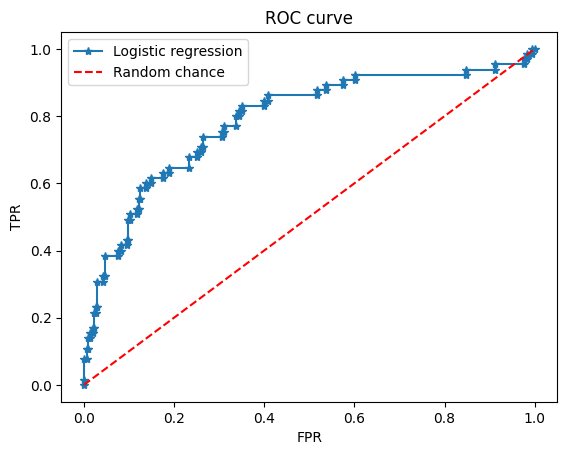

In [75]:
plt.plot(fpr, tpr,"*-")
plt.plot([0,1], [0,1], "r--")
plt.legend(["Logistic regression", "Random chance"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve");

In [76]:
roc_auc_score(y_test, pos_prob)

0.7877126174155877

In [77]:
precision, recall, thresholds = precision_recall_curve(y_test,pos_prob)

In [78]:
precision

array([0.17663043, 0.17711172, 0.17759563, 0.17534247, 0.17582418,
       0.17630854, 0.17679558, 0.17451524, 0.175     , 0.17548747,
       0.17318436, 0.17366947, 0.1741573 , 0.17464789, 0.17514124,
       0.17563739, 0.17613636, 0.17663818, 0.17714286, 0.17765043,
       0.17816092, 0.17867435, 0.17919075, 0.17971014, 0.18023256,
       0.18075802, 0.18128655, 0.18181818, 0.18235294, 0.18289086,
       0.18343195, 0.1810089 , 0.18154762, 0.18208955, 0.18263473,
       0.18318318, 0.18373494, 0.18429003, 0.18484848, 0.18541033,
       0.18597561, 0.18654434, 0.18711656, 0.18769231, 0.1882716 ,
       0.18885449, 0.18944099, 0.19003115, 0.190625  , 0.19122257,
       0.1918239 , 0.18927445, 0.18987342, 0.19047619, 0.1910828 ,
       0.19169329, 0.19230769, 0.19292605, 0.19354839, 0.19417476,
       0.19480519, 0.19543974, 0.19607843, 0.19672131, 0.19736842,
       0.1980198 , 0.1986755 , 0.19933555, 0.2       , 0.2006689 ,
       0.20134228, 0.2020202 , 0.2027027 , 0.20338983, 0.20408

In [79]:
thresholds

array([0.0018648 , 0.0027096 , 0.00299557, 0.00313652, 0.0034643 ,
       0.00381455, 0.00418306, 0.00430821, 0.00455553, 0.00465686,
       0.00577083, 0.00577483, 0.00603783, 0.00623734, 0.00652235,
       0.006779  , 0.00697192, 0.00734897, 0.00777179, 0.00802994,
       0.00803791, 0.00875094, 0.00878606, 0.00903774, 0.00932509,
       0.00959656, 0.0102714 , 0.01036451, 0.01107779, 0.01156094,
       0.01193124, 0.0124426 , 0.01260946, 0.01282173, 0.01290772,
       0.01317274, 0.01350744, 0.01350826, 0.01365548, 0.01374736,
       0.01419605, 0.01437353, 0.01476689, 0.01514899, 0.01533315,
       0.01535377, 0.01578298, 0.01615908, 0.01650808, 0.01677429,
       0.01688554, 0.0171052 , 0.01739406, 0.0174213 , 0.01753033,
       0.01768021, 0.01768114, 0.01779736, 0.01794808, 0.0181453 ,
       0.01933761, 0.01939234, 0.01959251, 0.01986392, 0.01997468,
       0.02014509, 0.02039804, 0.02042129, 0.0215719 , 0.02178292,
       0.02195005, 0.02282829, 0.02284723, 0.02318197, 0.02342

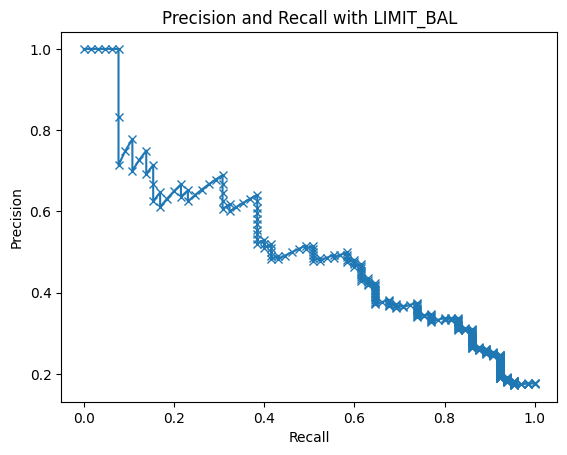

In [80]:
plt.plot(recall, precision, "-x")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision and Recall with LIMIT_BAL");

In [81]:
auc(recall, precision)

0.512628692105674

In [82]:
#Ajustando o threshold do modelo:
#Para precision por volta de 0.7, podemos, alterando o threshold, melhorar o recall.
#O atual precision é de 0.7 mas há outros pontos 0.7 de precision com recall maior.
custom_threshold = 0.46
predictions = (pos_prob >= custom_threshold).astype(int)

In [83]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [84]:
score4 = accuracy_score(y_test, predictions)
score4

0.845108695652174

In [85]:
score5 = precision_score(y_test, predictions)
score5

0.6538461538461539

In [86]:
score6 = recall_score(y_test, predictions)
score6
#Com a otimização do threshold houve uma melhora no recall em 5p.p. sem perder p.p. em precision.

0.26153846153846155

# Treinamento e teste de algoritmo:
  
  2) Naive Bayes:

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [88]:
modelo = GaussianNB()
modelo.fit(X_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
previsoes2 = modelo.predict(X_test)
previsoes2

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [90]:
confusao1 = confusion_matrix(y_test, previsoes2)
confusao1

array([[202, 108],
       [ 15,  43]])

In [91]:
precisao1 = accuracy_score(y_test, previsoes2)
precisao1

0.6657608695652174

In [92]:
precisao2 = precision_score(y_test, previsoes2)
precisao2

0.2847682119205298

In [93]:
precisao3 = recall_score(y_test, previsoes2)
precisao3

0.7413793103448276

# Treinamento e teste de algoritmo:
  
  3) Random Forest:

In [94]:
modelo2 = RandomForestClassifier()
modelo2.fit(X_train, y_train)

<ipython-input-94-4e33be628c90>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo2.fit(X_train, y_train)


RandomForestClassifier()

In [95]:
previsoes3 = modelo2.predict(X_test)
previsoes3

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [96]:
confusao3 = confusion_matrix(y_test, previsoes3)
confusao3

array([[304,   6],
       [ 44,  14]])

In [97]:
precisao4 = accuracy_score(y_test, previsoes3)
precisao4

0.8641304347826086

In [98]:
precisao5 = precision_score(y_test, previsoes3)
precisao5

0.7

In [99]:
precisao6 = recall_score(y_test, previsoes3)
precisao6

0.2413793103448276